## 1. Откроем файл с данными и изучим информацию

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.1. Иимпорт библиотек pandas, numpy, matplotlib.pyplot, seaborn, scipy

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
pd.set_option('display.max_columns', None) #настройка, чтобы pandas не урезал столбцы

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data/games.csv')


### 1.2. Выведем 10 первых строк датафрема data

In [4]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### 1.3. Оценим объем данных таблицы

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 1.4. Построим общие гистограммы для всех числовых столбцов

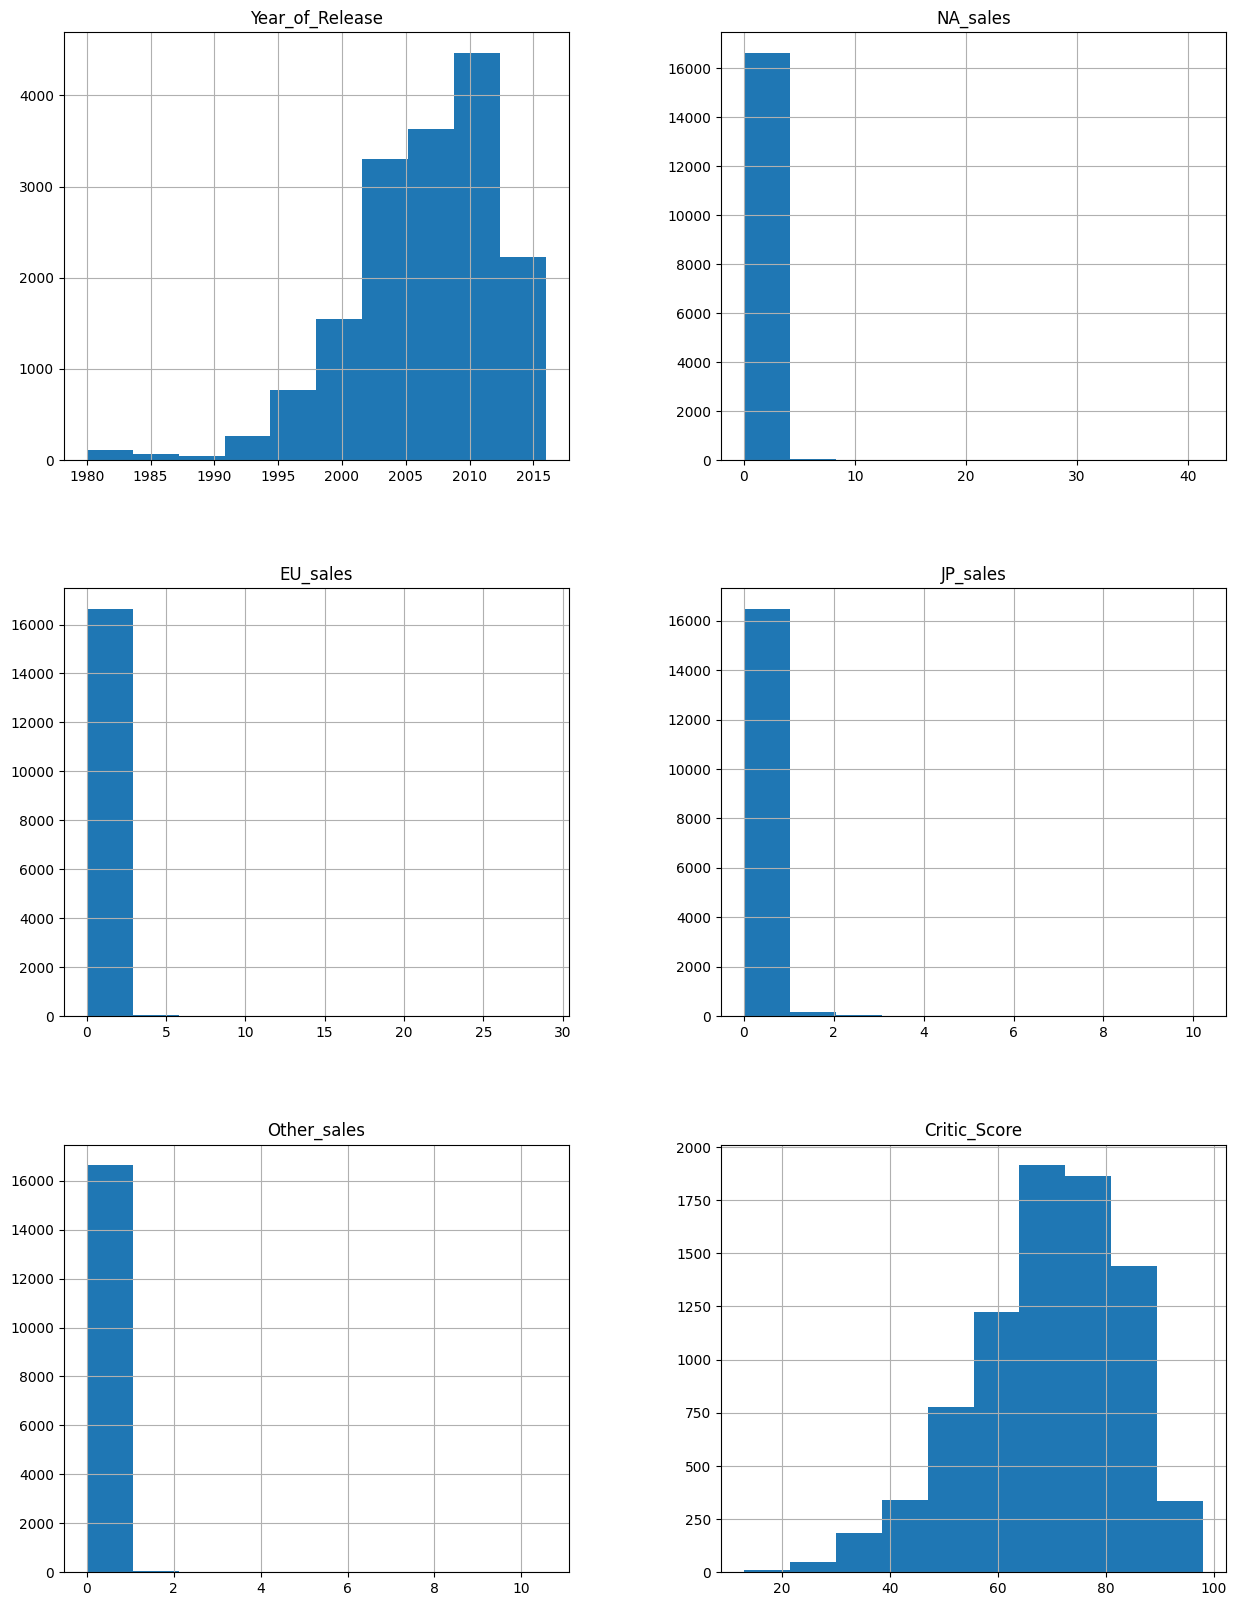

In [6]:
data.hist(figsize=(15, 20));

Датафрейм состоит из 16 715 строк и 11 колонок. Наименования колонок приведем к нижнему регистру. Данные в столбце Year_of_Release имеют не корректный тип данных, который следует изменить на int (поскольку указан только год, перевод к формату datetime не нужен).
Также следует обратить внимание на данные в столбце User_score - возможна ошика в типе данных (перевести в float).
    
По гистограмме Year_of_Release видно, что количество данных за период с 1980 по 1995 меньше 500, в связи с этим признаем их выбросами и не учитываем в дальнейшем анализе.
В гистограммах NA_sales, EU_sales и Other_sales видны аномальные значения (продажи более 5, 2,5, 1 и 1 соответственно). Однако оставим эти данные, возможно они помогут выявить особенности и/или закономерности.

## 2. Подготовка данных

### 2.1. Заменим названия столбцов (приведем к нижнему регистру)

In [7]:
data.columns = data.columns.str.lower()

### 2.2. Преобразуем данные в нужные типы

Изменим тип данных в столбце и user_score (тип данных object меняем на float), чтобы в дальнейшем была возможность осуществлять операции с данными в этом столбце.

In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### 2.3. Найдем количество пропущенных значений для каждого столбца

In [9]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


Пропуски с столбцах year_of_release, name и genre составляют 1.6%, 0.1% и 0.1% соответственно (менее 10% датафрема), поэтому строки с пропусками можно удалить.

In [10]:
data = data.dropna(subset=['year_of_release', 'name', 'genre'])
data = data.reset_index(drop=True) #восстанавливаем индексацию

In [11]:
# измениv тип данных на int для упрощения дальнейших операций
data['year_of_release'] = data['year_of_release'].astype('int')

### 2.4. Обработаем пропуски

#### 2.4.1. Заменим пропуски в столбце rating на 'unknown'.

Данне пропуски могли образоваться как по техническим причинам (ошибки при загрузке/выгрузке данных, ошибка приобработке данных и проч.), так и под влиянием человеческого фактора (не заполнены данные, пользователи/ эксперты не определились с оценкой и проч.)

In [12]:
data['rating'] = data['rating'].fillna('unknown')

#### 2.4.2. Изучим данные в столбце user_score.

Изучим данные в столбце user_score. Методом value_counts были найдены значения tbd. TBD расшифровывается как to be determined (будет определено). Можно предположить, что скорее всего это означает, что пользователи не определились с оценкой. Для расчетов в данном стобце зменим их на Nan.

NaN замещает отсутствующее в ячейке число и принадлежит к типу float, поэтому с ним можно проводить математические операции.

In [13]:
print(data['user_score'].value_counts())
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan #tbd заменим на nan

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: user_score, Length: 95, dtype: int64


In [14]:
#проверим дата фрем на пропуски поле обработки
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64


### 2.5. Проверим датафрем на дубликаты

In [15]:
print(data.duplicated().sum())

0


### 2.6. Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец

In [16]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [17]:
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


## 3. Проведем исследовательский анализ данных

### 3.1. Посмотрим, сколько игр выпускалось в разные годы.

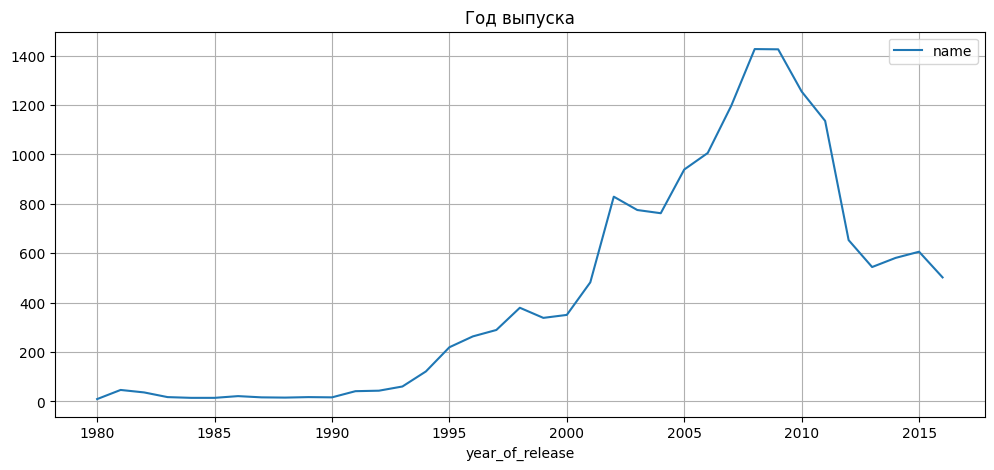

In [18]:
games_number = data.pivot_table(index='year_of_release',
                                values='name', aggfunc='count').plot(title='Год выпуска',
                                                                     grid=True, figsize=(12, 5))
# На графике видно, что с 1980 по 1993 года выпускалось совсем незначительное
# количество игр и отсутствовала какая-либо динамика.
# Поэтому принимаем решение не учитывать данные ранее 1990 года.

data = data.query('year_of_release > 1993')

In [19]:
data.info()
# проверим, не исказит ли данные удаление строк с годами ранее 1990. Количество строк стало 16079.
# В первоначальном датафреме количество строк было 16715. Количество удаленных строк менее 10%, т.е.
# данное удаление не исказит дальнейший анализ.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16079 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16079 non-null  object 
 1   platform         16079 non-null  object 
 2   year_of_release  16079 non-null  int64  
 3   genre            16079 non-null  object 
 4   na_sales         16079 non-null  float64
 5   eu_sales         16079 non-null  float64
 6   jp_sales         16079 non-null  float64
 7   other_sales      16079 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           16079 non-null  object 
 11  total_sales      16079 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### 3.2. Изменение продаж по платформам

Посмотрим, как менялись продажи по платформам. По каждой платформе выявим суммарные продажи по годам и построим графики отдельно для каждой платформе. Определим, за какой характерный срок появляются новые и исчезают старые платформы.

In [20]:
platform_top = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_top.head(10)) #найдем платформы с наибльшими продажами.

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


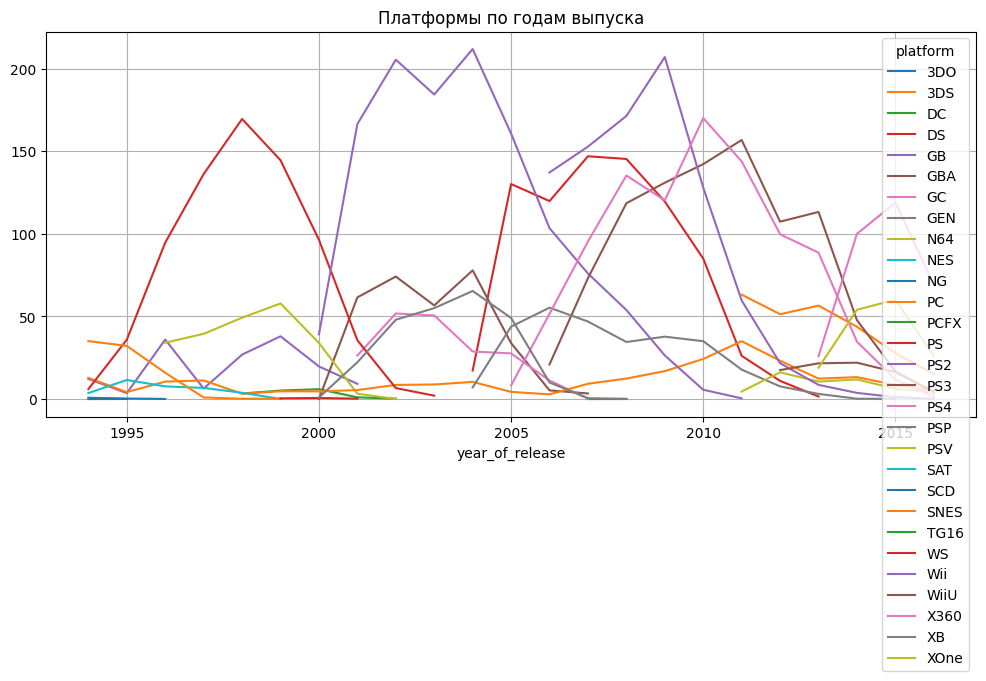

In [22]:
data.pivot_table(index='year_of_release', columns = 'platform',
                 values='total_sales', aggfunc='sum'
                ).plot(title='Платформы по годам выпуска',
                  grid=True, figsize=(12, 5));

На графике можно увидеть вначале рост продаж той или иной платформе, затем ее поадение и смену на другую болле неовую платформу. Данное явление имеет в основном форму купола (нормальное распредление). Однако на графике сложно выявить кокретные платформы и определить особенности и закономерности по каждой из них. Поэтому сформируем сводные таблицы и построим графики по каждой платформе отдельно

total_sales
platform year_of_release             
Wii      2006                  137.15
         2007                  152.77
         2008                  171.32
         2009                  206.97
         2010                  127.95
         2011                   59.65
         2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18

total_sales
platform year_of_release             
GB       1994                   12.18
         1995                    3.60
         1996                   36.03
         1997                    6.37
         1998                   26.90
         1999                   38.00
         2000                   19.76
         2001                    9.24

total_sales
platform year_of_release             
DS       2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
         2008                  145.31
         2009                  119.54
         2010                   85.02
         2011                   26.18
         2012                   11.01
         2013                    1.54

total_sales
platform year_of_release             
X360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

total_sales
platform year_of_release             
PS3      2006                   20.96
         2007                   73.19
         2008                  118.52
         2009                  130.93
         2010                  142.17
         2011                  156.78
         2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60

total_sales
platform year_of_release             
PS2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45

total_sales
platform year_of_release             
GBA      2000                    0.07
         2001                   61.53
         2002                   74.16
         2003                   56.67
         2004                   77.91
         2005                   33.86
         2006                    5.28
         2007                    3.40

total_sales
platform year_of_release             
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25

total_sales
platform year_of_release             
3DS      2011                   63.20
         2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14

total_sales
platform year_of_release             
N64      1996                   34.10
         1997                   39.50
         1998                   49.24
         1999                   57.87
         2000                   33.97
         2001                    3.25
         2002                    0.08

total_sales
platform year_of_release             
PS       1994                    6.03
         1995                   35.96
         1996                   94.70
         1997                  136.17
         1998                  169.49
         1999                  144.53
         2000                   96.37
         2001                   35.59
         2002                    6.67
         2003                    2.07

total_sales
platform year_of_release             
SNES     1994                   35.08
         1995                   32.20
         1996                   15.92
         1997                    0.99
         1998                    0.22
         1999                    0.26

total_sales
platform year_of_release             
XB       2000                    0.99
         2001                   22.26
         2002                   48.01
         2003                   55.04
         2004                   65.42
         2005                   49.08
         2006                   10.04
         2007                    0.55
         2008                    0.18

total_sales
platform year_of_release             
PC       1994                   12.87
         1995                    4.22
         1996                   10.58
         1997                   11.27
         1998                    3.26
         1999                    4.74
         2000                    4.66
         2001                    5.47
         2002                    8.57
         2003                    8.84
         2004                   10.39
         2005                    4.37
         2006                    2.85
         2007                    9.28
         2008                   12.42
         2009                   16.91
         2010                   24.28
         2011                   35.03
         2012                   23.22
         2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25

total_sales
platform year_of_release             
PSP      2004                    7.06
         2005                   43.84
         2006                   55.32
         2007                   46.93
         2008                   34.55
         2009                   37.78
         2010                   35.04
         2011                   17.82
         2012                    7.69
         2013                    3.14
         2014                    0.24
         2015                    0.12

total_sales
platform year_of_release             
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

total_sales
platform year_of_release             
WiiU     2012                   17.56
         2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60

total_sales
platform year_of_release             
GC       2001                   26.34
         2002                   51.81
         2003                   50.61
         2004                   28.82
         2005                   27.62
         2006                   11.26
         2007                    0.27

total_sales
platform year_of_release             
DC       1998                    3.38
         1999                    5.16
         2000                    5.99
         2001                    1.07
         2002                    0.29
         2007                    0.02
         2008                    0.04

total_sales
platform year_of_release             
PSV      2011                    4.63
         2012                   16.19
         2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


total_sales
platform year_of_release             
SAT      1994                    3.65
         1995                   11.57
         1996                    7.69
         1997                    6.77
         1998                    3.82
         1999                    0.09

,,total_sales
platform,year_of_release,
GEN,1994,8.13


total_sales
platform year_of_release             
WS       1999                    0.46
         2000                    0.68
         2001                    0.28

total_sales
platform year_of_release             
NG       1994                    0.80
         1995                    0.33
         1996                    0.10

,,total_sales
platform,year_of_release,
SCD,1994,0.36


,,total_sales
platform,year_of_release,
TG16,1995,0.16


,,total_sales
platform,year_of_release,
NES,1994,0.11


total_sales
platform year_of_release             
3DO      1994                    0.02
         1995                    0.08

,,total_sales
platform,year_of_release,
PCFX,1996,0.03


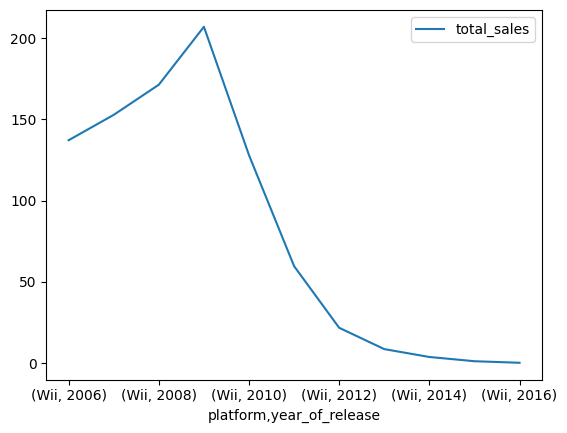

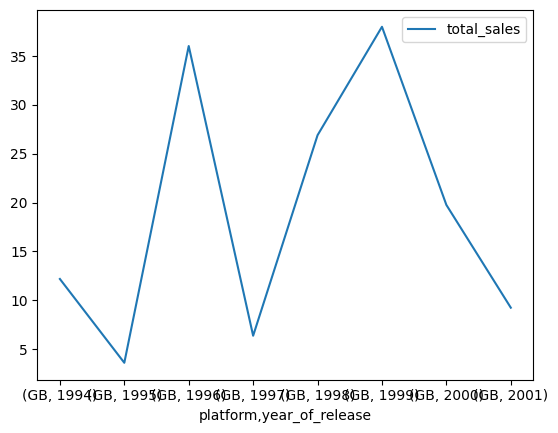

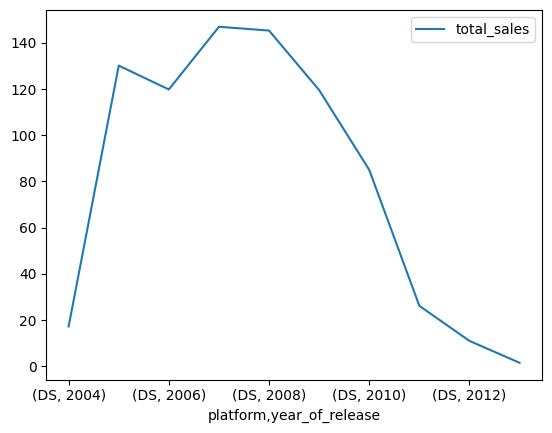

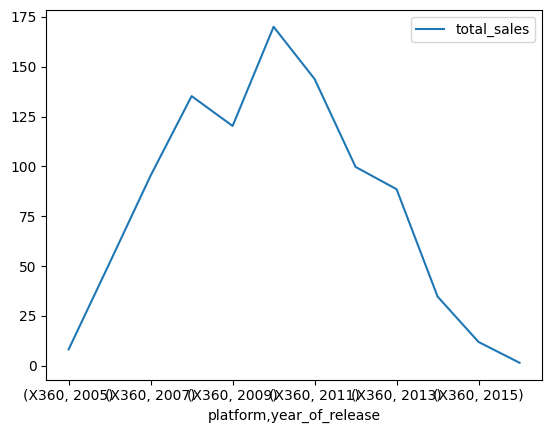

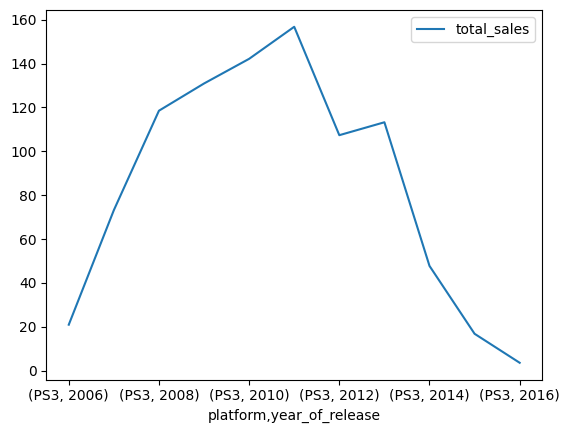

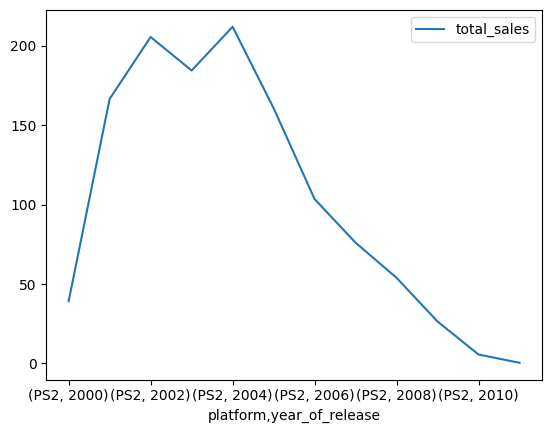

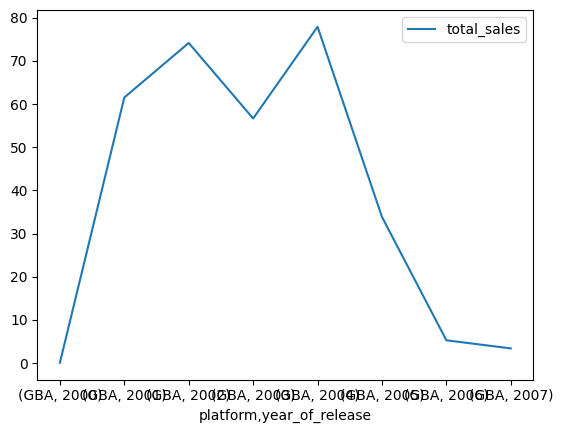

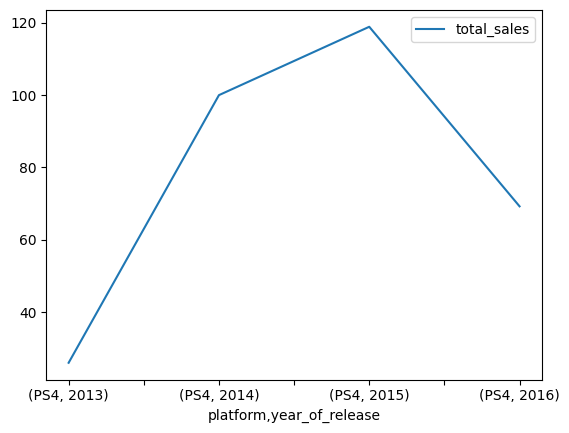

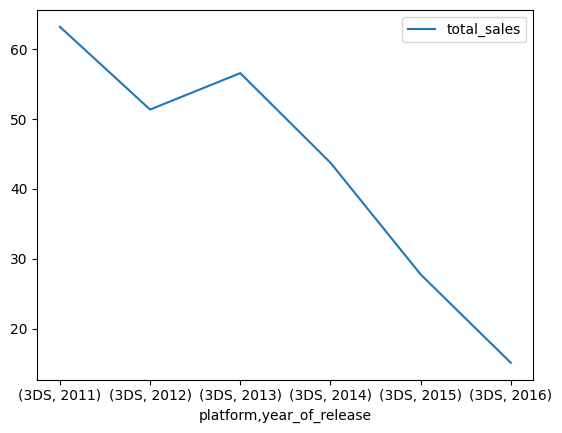

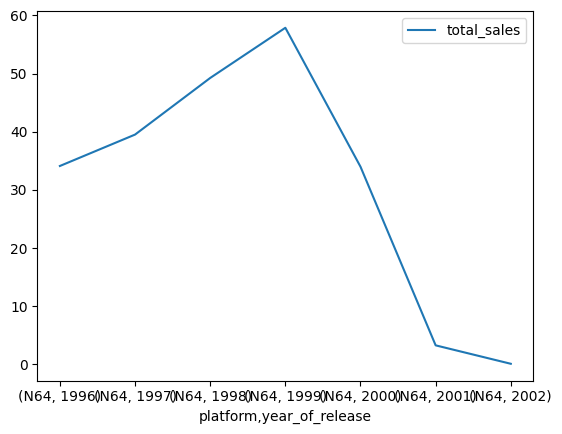

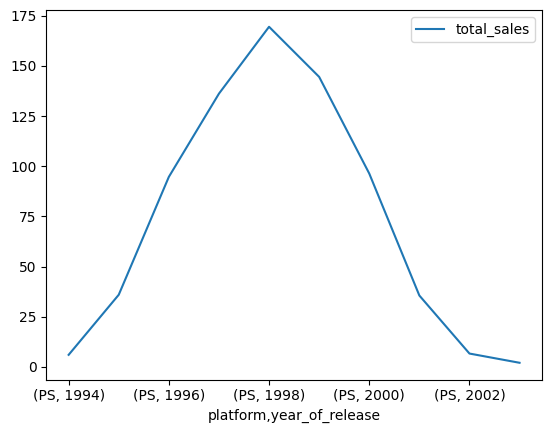

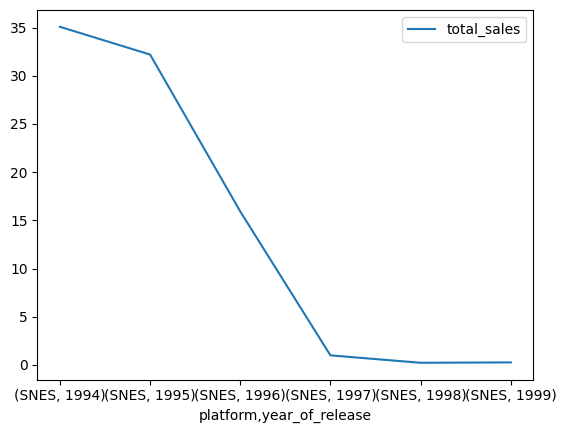

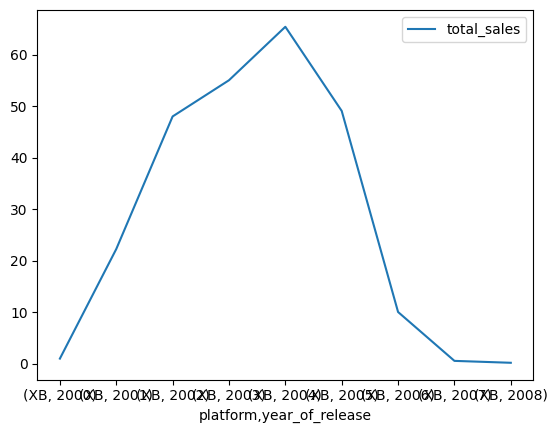

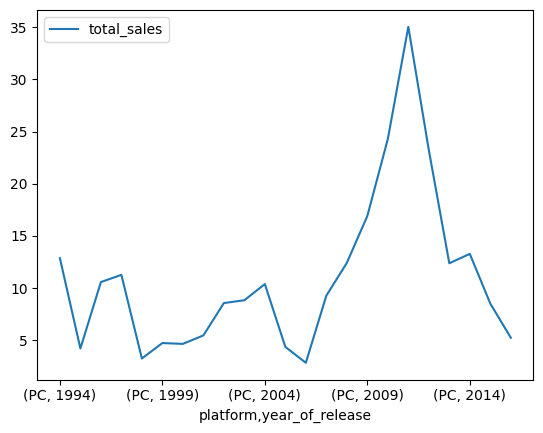

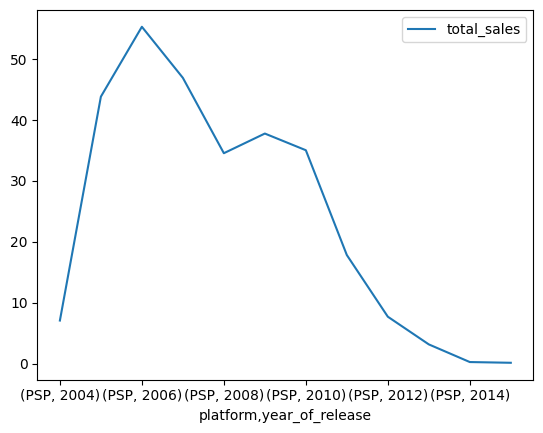

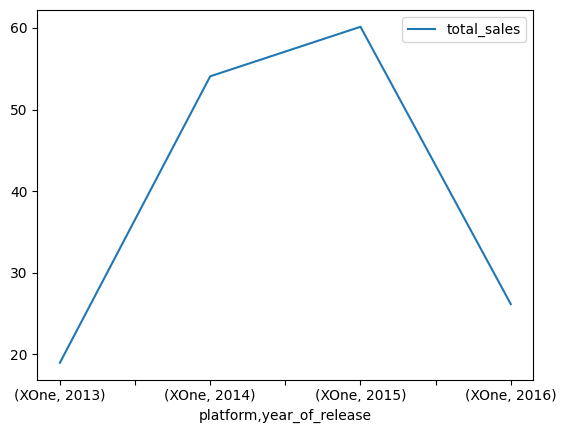

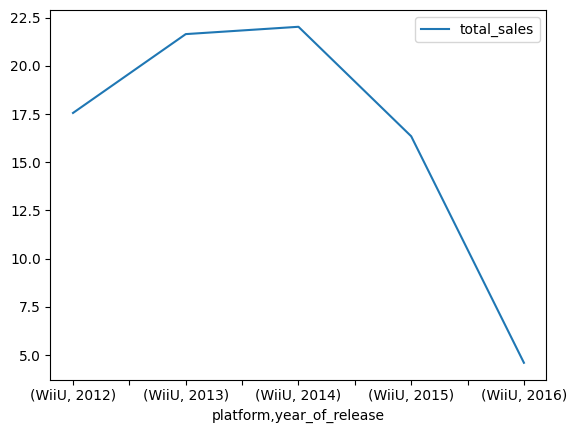

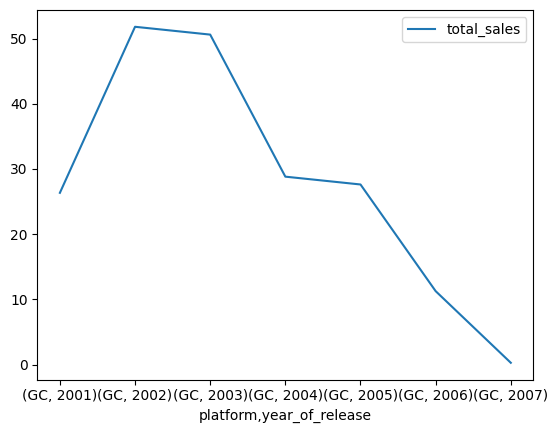

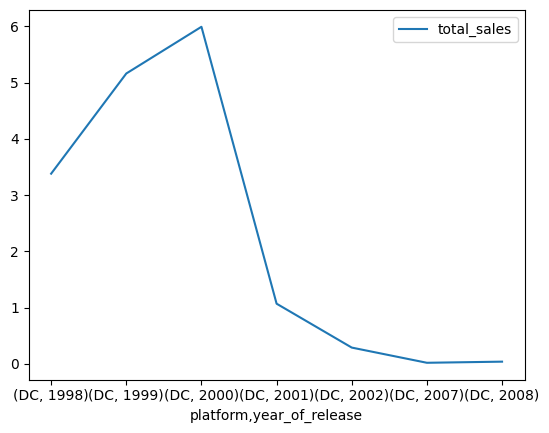

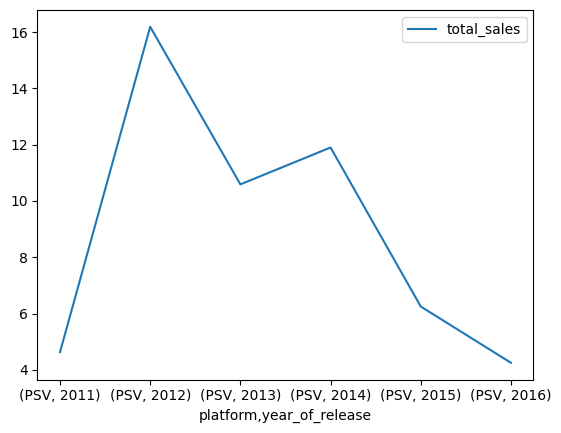

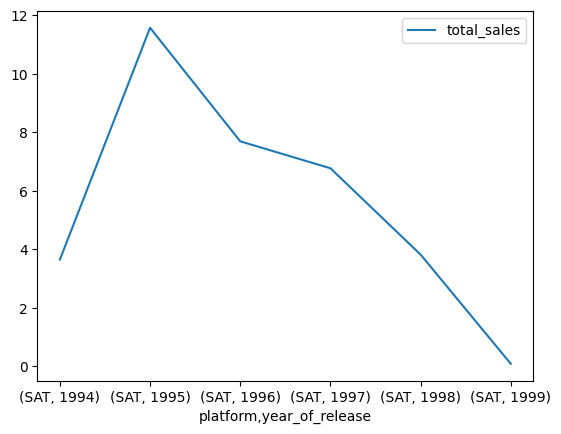

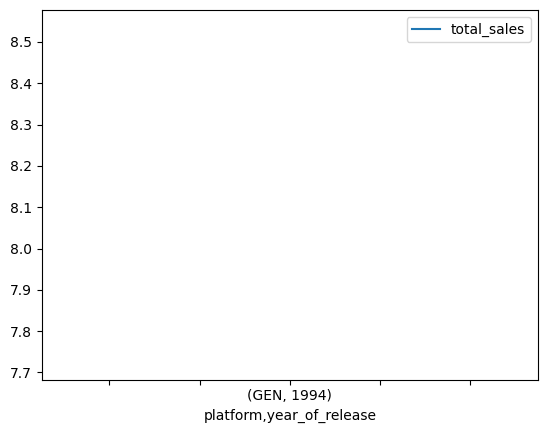

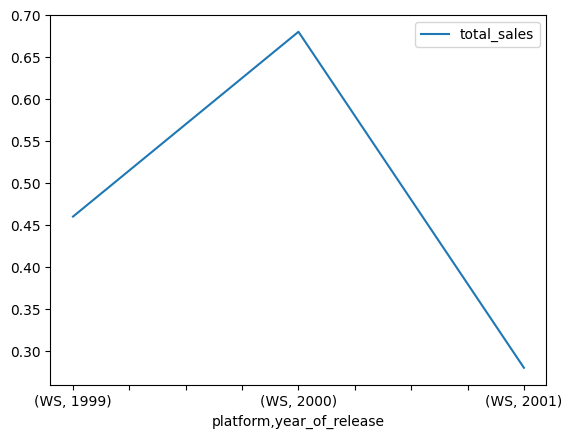

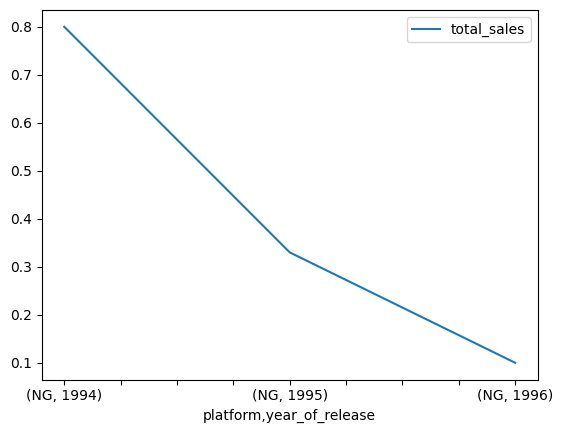

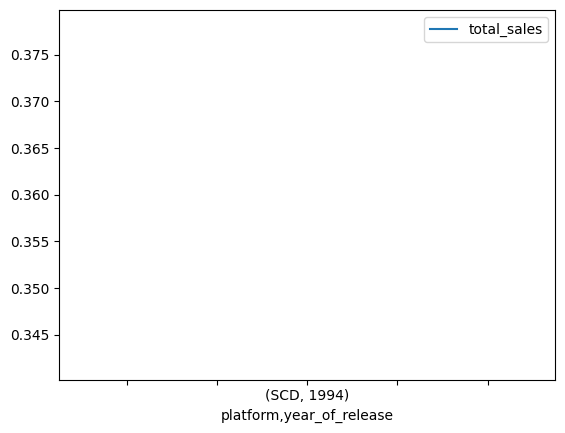

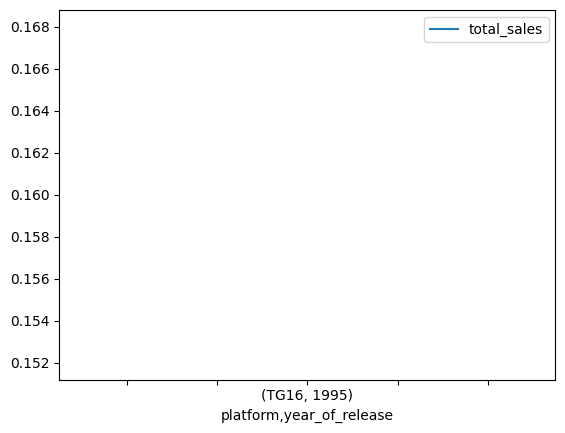

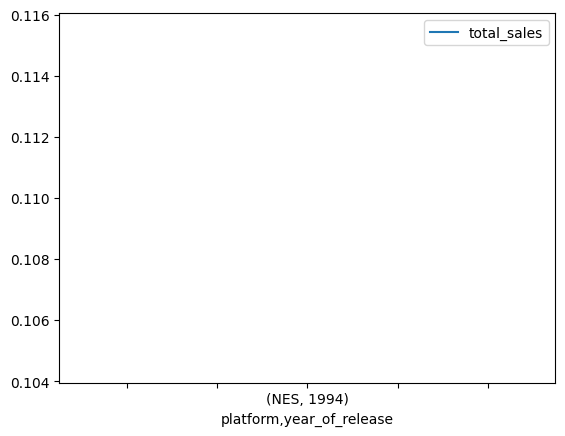

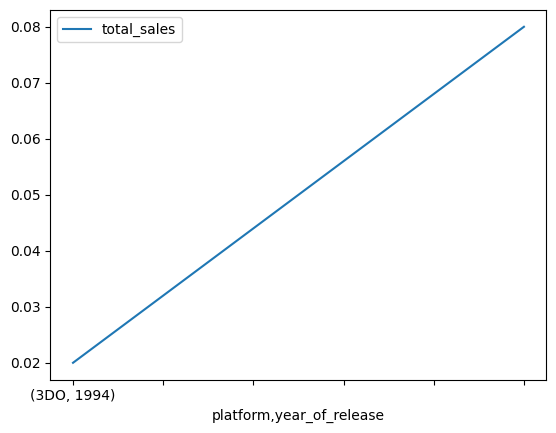

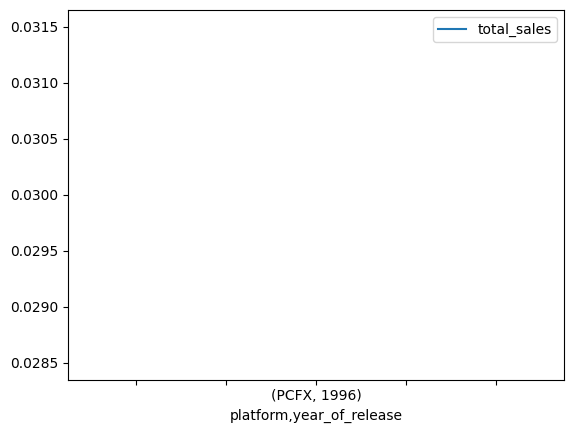

In [23]:
for platform in data['platform'].unique():
    platform_pivot = data.loc[data['platform'] == platform
                             ].pivot_table(index=['platform',
                                                  'year_of_release'],
                                           values='total_sales', aggfunc='sum')
    platform_pivot.plot(kind='line')
    display(platform_pivot)

При изучении данных выявлено следующее:
Самые большие суммарные продажи были по платформам PS2, X360, PS3, Wii, DS и PS.
У всех этих платформ прослеживается пик продаж в середине периода их работы, а затем к 2016 году идет спад.  

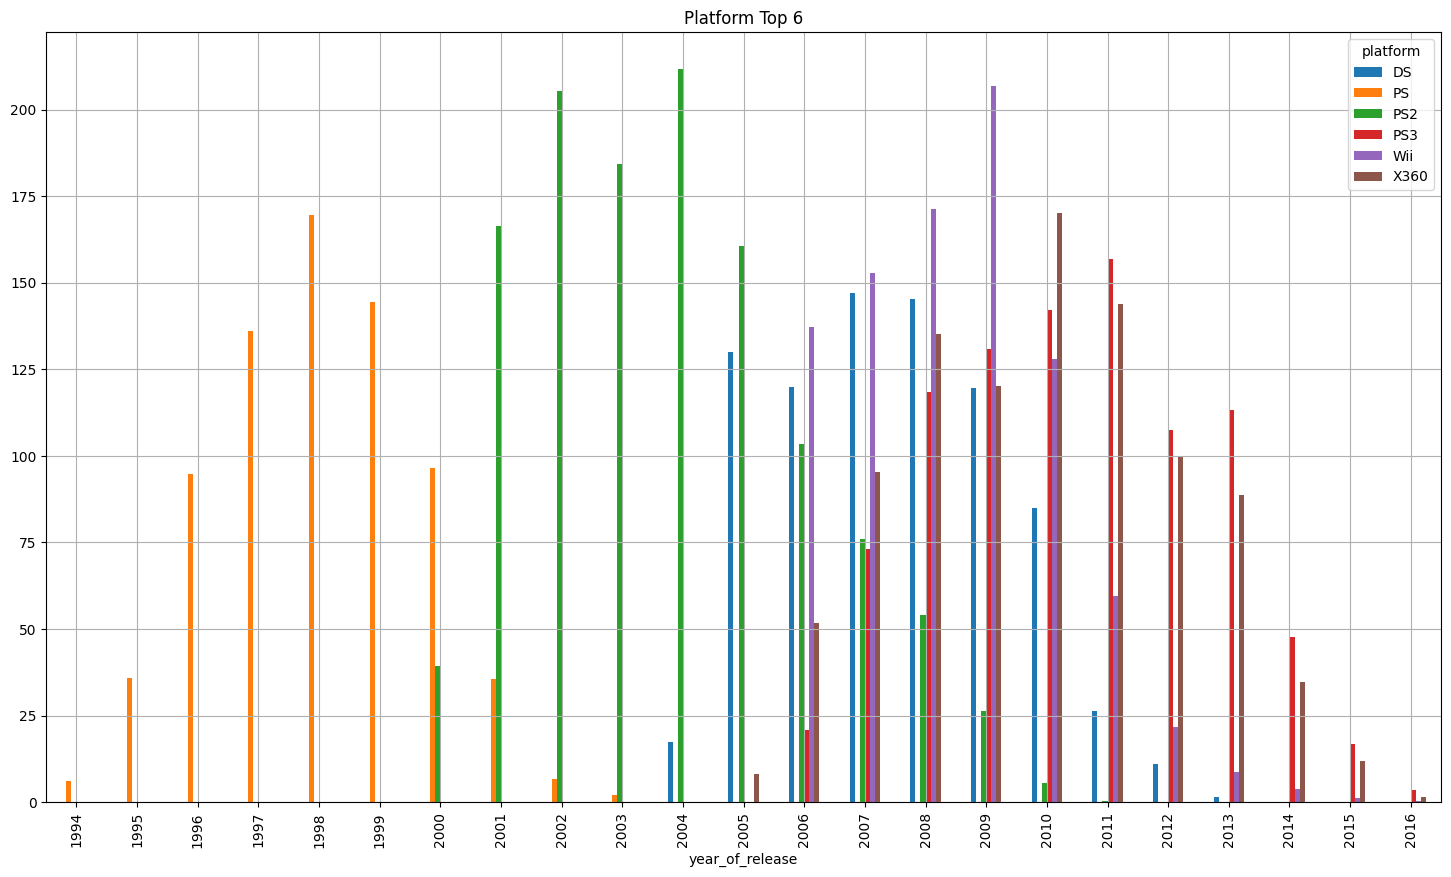

In [24]:
#построим график суммуарных продаж по платформам с самыми большими продажами (топ 6)
platform_top6 = data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS"]'
                          ).pivot_table(index='year_of_release', columns='platform',
                                        values='total_sales', aggfunc='sum'
                                       ).plot(title='Platform Top 6', kind='bar',
                                                  figsize=(18, 10), grid=True);
#на графике видна закономерность: пик продаж через 3-4 года после выпуска,
#новые платформы появляются, а старые исчезают
#кажде 5-7 леn

На графике также видно, что за период с 2006 по 2010 платформы из списка топ6 существовали вместе, а затем к 2016 году видимо начали постепенно уходить из использования, щаменяясь на более новыы.

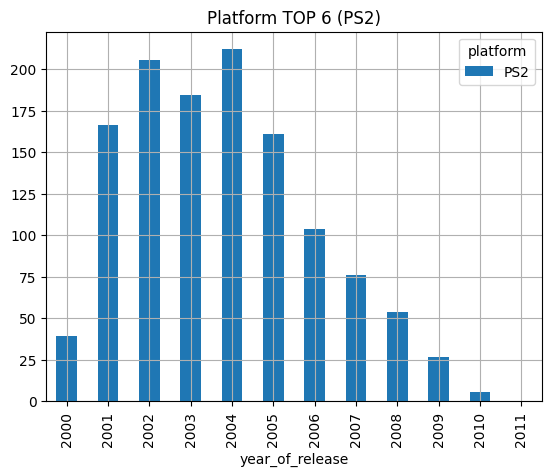

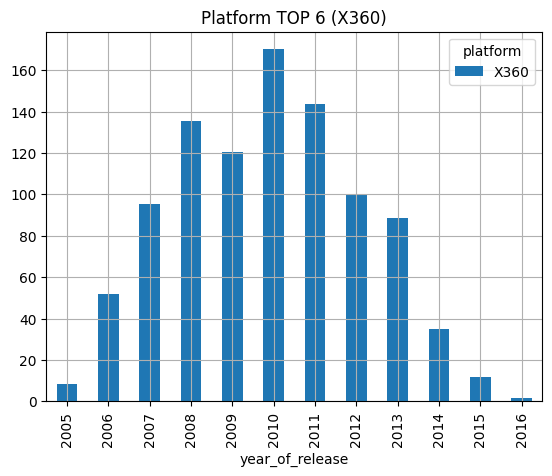

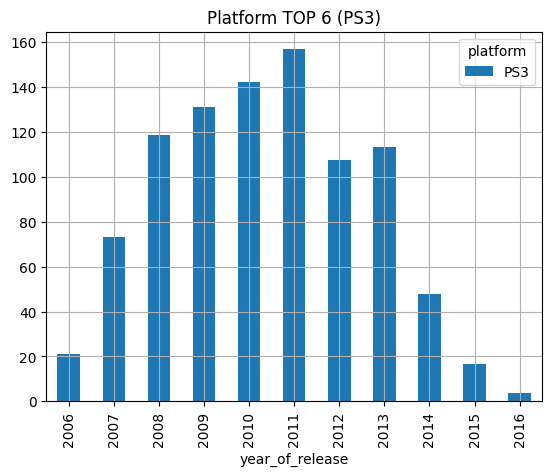

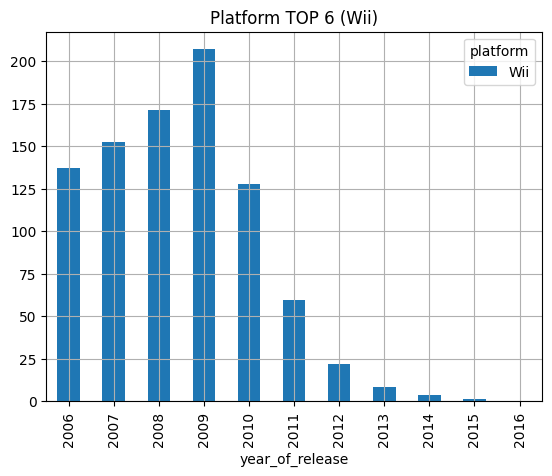

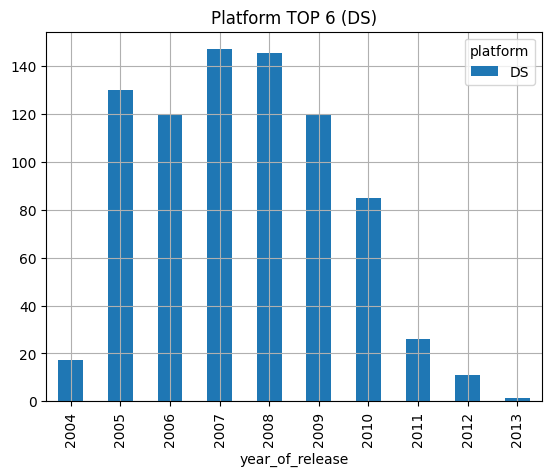

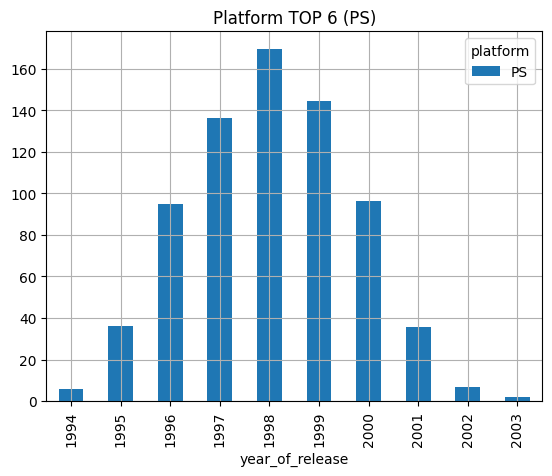

In [25]:
platform_top6 = data.query('platform == ["PS2"]'
                          ).pivot_table(index='year_of_release', columns='platform',
                                        values='total_sales', aggfunc='sum'
                                       ).plot(title='Platform TOP 6 (PS2)', kind='bar', grid=True);
platform_top6 = data.query('platform == ["X360"]'
                          ).pivot_table(index='year_of_release', columns='platform',
                                        values='total_sales', aggfunc='sum'
                                       ).plot(title='Platform TOP 6 (X360)', kind='bar', grid=True);
platform_top6 = data.query('platform == ["PS3"]'
                          ).pivot_table(index='year_of_release', columns='platform',
                                        values='total_sales', aggfunc='sum'
                                       ).plot(title='Platform TOP 6 (PS3)', kind='bar', grid=True);
platform_top6 = data.query('platform == ["Wii"]'
                          ).pivot_table(index='year_of_release', columns='platform',
                                        values='total_sales', aggfunc='sum'
                                       ).plot(title='Platform TOP 6 (Wii)', kind='bar', grid=True);
platform_top6 = data.query('platform == ["DS"]'
                          ).pivot_table(index='year_of_release', columns='platform',
                                        values='total_sales', aggfunc='sum'
                                       ).plot(title='Platform TOP 6 (DS)', kind='bar', grid=True);
platform_top6 = data.query('platform == ["PS"]'
                          ).pivot_table(index='year_of_release', columns='platform',
                                        values='total_sales', aggfunc='sum'
                                       ).plot(title='Platform TOP 6 (PS)', kind='bar', grid=True);

PS2 - пик продаж (более 200) был в 2002 и 2004 годах, затем замечался ежегодный спад, и платформа стала неактуальной уже 2011 году.
    
X360 - график имеет вид нормального распределения. Пик продаж более 160 приходится на 2010 год, затем идет спад, и в 2016 году платформа уже становится неактуальной.

PS3 - с 2008 по 2011 год идет рост продаж с 120 до примерно 160. Скорее всего это связано с тем, что платформа PS3 заменила более старую верстию PS2, спад которой пришелся на период роста PS3. В 2012 и 2014 резкий спад, и к 2016 году платформа перестает быть актуальной.
    
Wii - с 2006 по 2009 рос продаж до 200, затем резкий спад. С 2014 по 2016 продажи были минимальными и практически прекратились.
    
DS - с 2005 по 2009 продажи были довольно стабильны (колебания от 120 до 140), пик продаж пришелся на 2007 и 2008 года, в 2010 и 2011 годах резкое падение продаж. В 2013 году продажа платформы прекратилась.
    
PS - график имеет вид нормального распределения, пик продаж более 160 приходится на 1998 год, платформа стала неактуаьной уже в 2003 году.

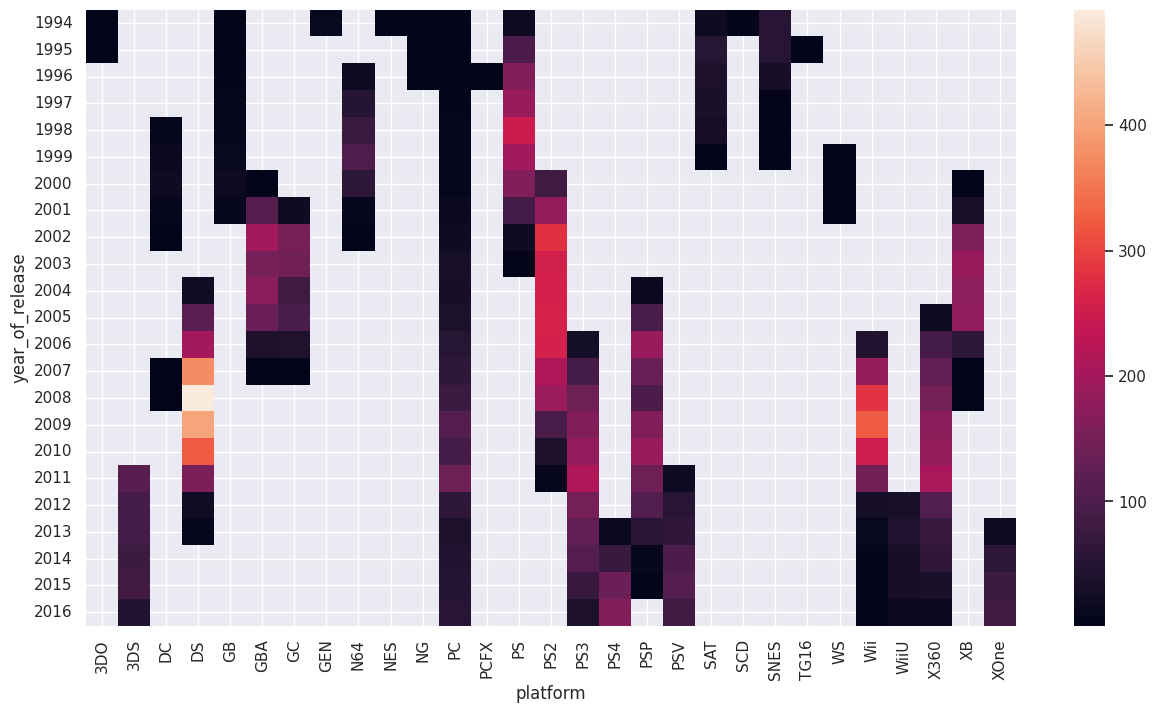

In [26]:
#проверим выявленную ранее закономерность, построив теплоую карту.
sb.set(rc = {'figure.figsize':(15,8)})
sb.heatmap(data.pivot_table(index='year_of_release', columns='platform',
                            values='name', aggfunc='count'));
#согласно тепловой карте новые платформы появляются, а старые исчезают примерно каждые 5-7 лет, что подтверждает
#ранее сделанный вывод

### 3.3. Определим актуальный период и возьммем из него данные для дальнейшего анализа.

Актуальным периодом будем считать период с 2014 по 2016 год.

In [27]:
data = data.query('year_of_release >= 2014') #определим актуальный период с 2014 по 2016

### 3.4. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

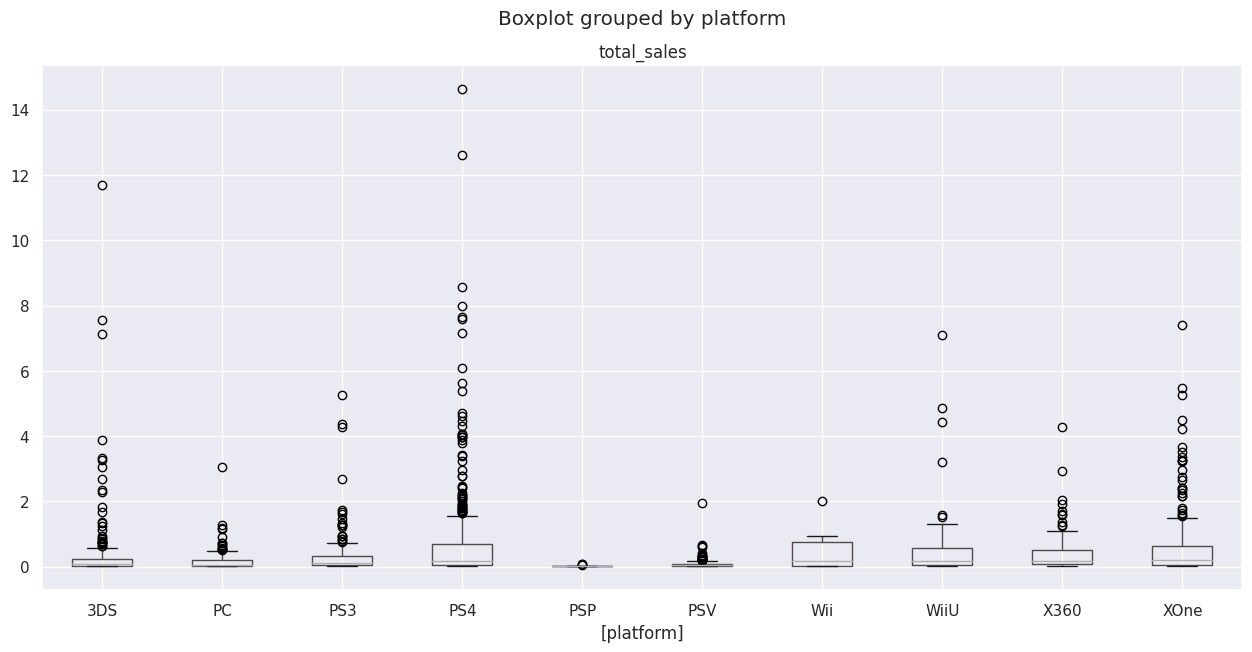

In [28]:
data.boxplot(column=['total_sales'], by=['platform'], figsize=(15, 7));
#построение диаграммы размаха или ящика с усами по каждой платформе

У платформы PS4 самый большой выброс. У платформ 3DS и Xone также можно заметить довольно большие выбросы.

Платформы PSP, PSV, PC - количество продаж намного меньше, чем у других платорм, что не позволяет сделать верный вывод о данных

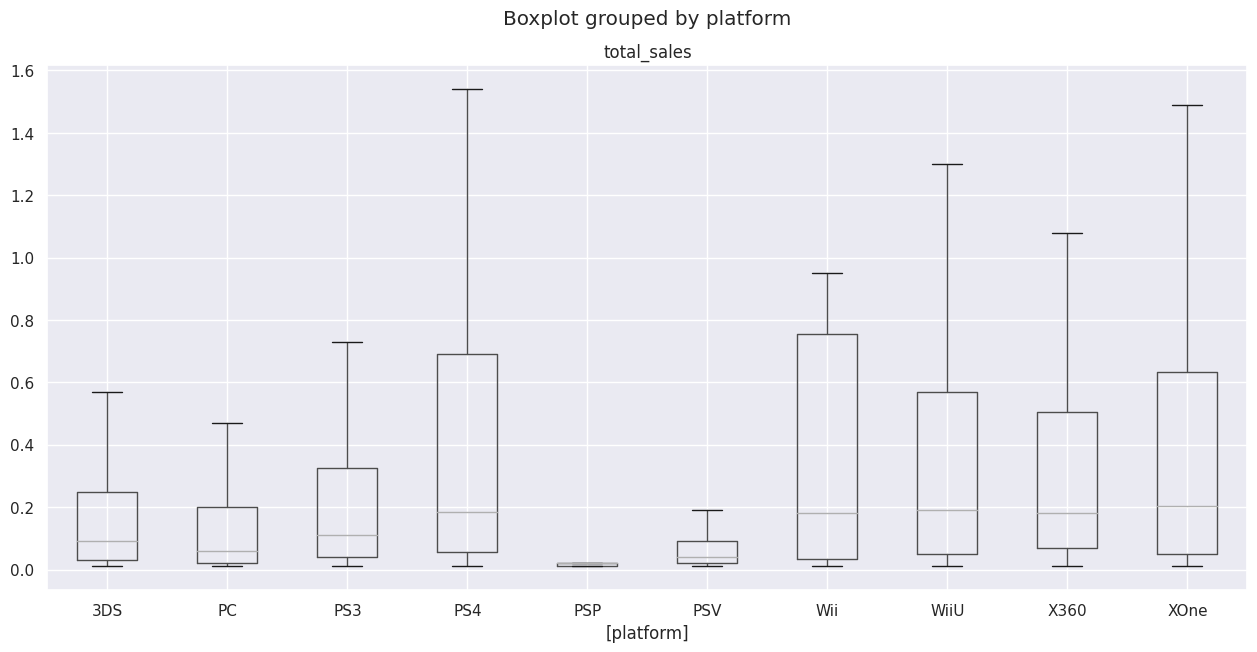

In [29]:
data.boxplot(column=['total_sales'], by=['platform'], showfliers=False, figsize=(15, 7));
#построение диаграммы размаха или ящика с усами по каждой платформе без выбросов

На графике без выбросов видим следующее:
    
Очень выделяется платформа GB: медиана примерно 0.7, что является самым большим значением. Q3 (третий квартиль - 75%) также самый бльшой 2.0, нормальные значения до 4.
    
Платформа GEN - Q3 примерно 1.3-1.4, нормальные значения не более 2 (1.75-1.8)
    
У всех остальных платформ медианы примерно на одном уровне в промежутке от 0.1 до 0.25. Q1 (первый квартиль - 25%) - у всех платформ немного больше 0 (около 0.1). Q3 и нормальные значения имеют довольно разбросанные значения.
    
Платформы 3DS, DC, DS, GBA, GC, PC, PSP, SAT, XB - Q3 у этих платформ менее 0.5, а нормальные значения не превышают 1
    
Платформы N64, PS, PS2, PS3, PS4, SNES, Wii, WiiU, X360, XOne - Q3 у этих платформ находится от 0.5 до 0.75, нормальные значения не превышают 1.75

In [30]:
print(data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum'
).describe())
#описание данных

       total_sales
count    10.000000
mean     72.945000
std      86.355404
min       0.360000
25%      23.562500
50%      45.600000
75%      82.055000
max     288.150000


Количество платформ - 16
средняя сумма продаж - 312
стандартное отклонение - 345 (это означает, что разброс данных очень сильный)
min значение - 0.06 (нижний ус упирается в 0)
max значение 953 (верхний ус немного не достает до 1000, рядом с 1000 видим точку - редкое значение (выброс))
медиана = 201 (также это видно на диаграмме - полоска посередине коробки)
первый квартиль - 43 (нижняя сторона коробки)
третий квартиль - 400 (верхняя сторона коробки)
Найдем ориентировочные границы нормального размаха - (400-43)* 1.5 = 535.5. Вправо - 400+535.5=935.5 - это значение
очень близко к максимальному, т.е. входит в границы нормального размаха.
Влево - минимальное значение = 0.06


### 3.5. Определим влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.

Коэффициент корреляции зависимости отзывов критиков и продаж (платформа PS4) 0.40266141068104083


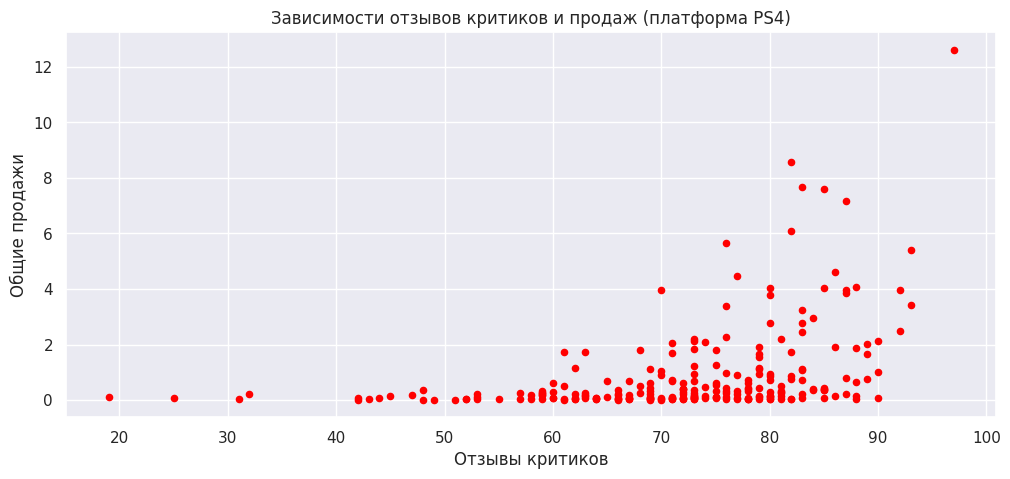

In [31]:
# для анализа возьмем платформу PS4.

platform_ps4 = data.loc[data['platform'] == 'PS4']

platform_ps4.plot(title='Зависимости отзывов критиков и продаж (платформа PS4)',
                  x='critic_score', y='total_sales', kind='scatter', color='red',
                  grid=True, figsize=(12, 5))
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи');
print('Коэффициент корреляции зависимости отзывов критиков и продаж (платформа PS4)',
      platform_ps4['critic_score'].corr(platform_ps4['total_sales']))

Коэффициент корреляции зависимости отзывов пользователей и продаж (платформа PS4) -0.040131589472697356


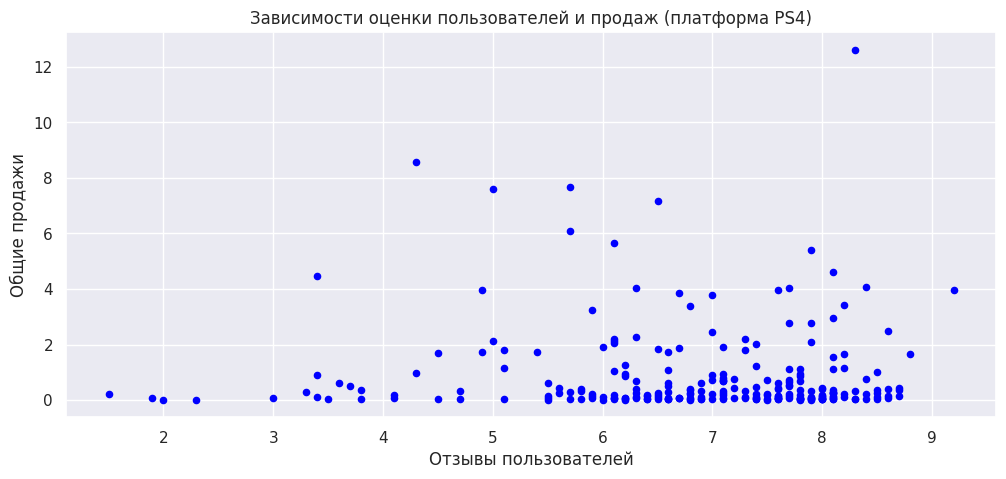

In [32]:
platform_ps4.plot(title='Зависимости оценки пользователей и продаж (платформа PS4)',
                  x='user_score', y='total_sales', kind='scatter',color='blue',
                  grid=True, figsize=(12, 5))
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи');
print('Коэффициент корреляции зависимости отзывов пользователей и продаж (платформа PS4)',
      platform_ps4['user_score'].corr(platform_ps4['total_sales']))

Зависимость отзывов и продаж на примере платформы PS4 довольно слабая. Отзывы критиков влияют на продажи чуть больше - корреляция 0.40, зависимость прямая - чем лучше оценка, тем больше продажи. Возможно это связано с тем, что мнение критиков считается авторитетным и на него оприаются пользователи при выборе платформы.
Оценка пользователей на продажи влияет очень слабо, корреляция отрицательная -0.04, зависимость обратная. На мой взгляд, такая низкая корреляяция говорит о том, что продажи платформы PS4 не зависят от отзывов пользователей. Возможно была проведена качественная рекламная компания, и пользователи ориентировлаись на нее или на другие факторы, а отзывы не играли особой роли.

На графике зависимости продаж от отзывов пользователей можем наблюдать больший разброс данных,
чем на графике зависимости продаж от отзывов критиков. На граифке зависимости продаж от отзывов критиков разброс начинается на болле высоких оценках - продажи резко увеличиваются. Всеже прослеживается тенденция чем выше оценка, тем больше сумма продаж.

### 3.6. Соотнесем выводы с продажами игр на других платформах.

In [33]:
#поскольку был выбран актуальный период с 2014 по 2016 годы, следует пересмотреть список самых прибыльных платформ.

platform_top5 = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
#актуализируем список самых прибыльных платформ, и сократим до топ-5: PS4, XOne, 3DS, PS3, X360
print(platform_top5)
platform_top5 = data.query('platform == ["PS4", "XOne", "3DS", "PS3", "X360"]')


platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


Коэффициент корреляции зависимости отзывов критиков и продаж (Платформы топ 5) 0.38802037798420363


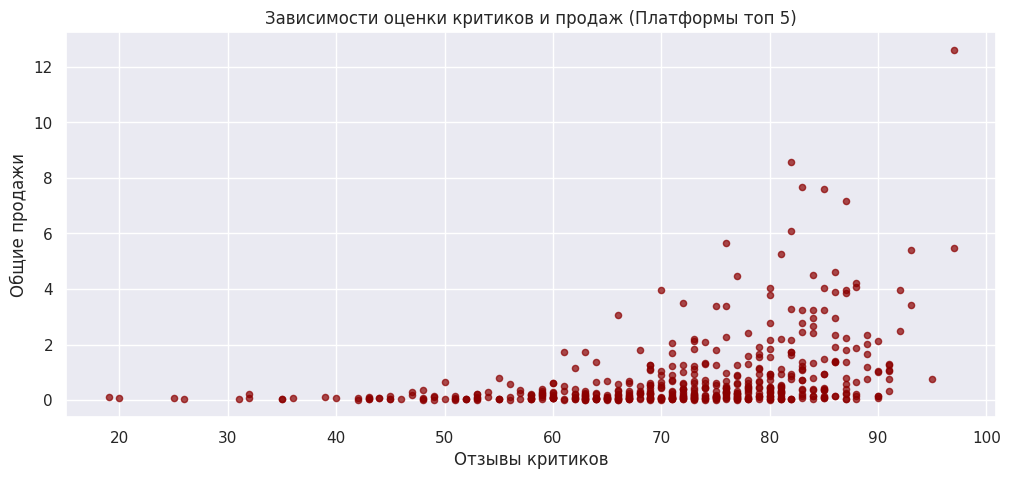

In [34]:
platform_top5.plot(title='Зависимости оценки критиков и продаж (Платформы топ 5)',
                   x='critic_score',
                   y='total_sales', kind='scatter', alpha=0.7,
                   color ='darkred', grid=True, figsize=(12, 5))
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи')

print('Коэффициент корреляции зависимости отзывов критиков и продаж (Платформы топ 5)',
      platform_top5['critic_score'].corr(platform_top5['total_sales']))

Коэффициент корреляции зависимости отзывов пользователей и продаж (Платформы топ 5) -0.023210659120351175


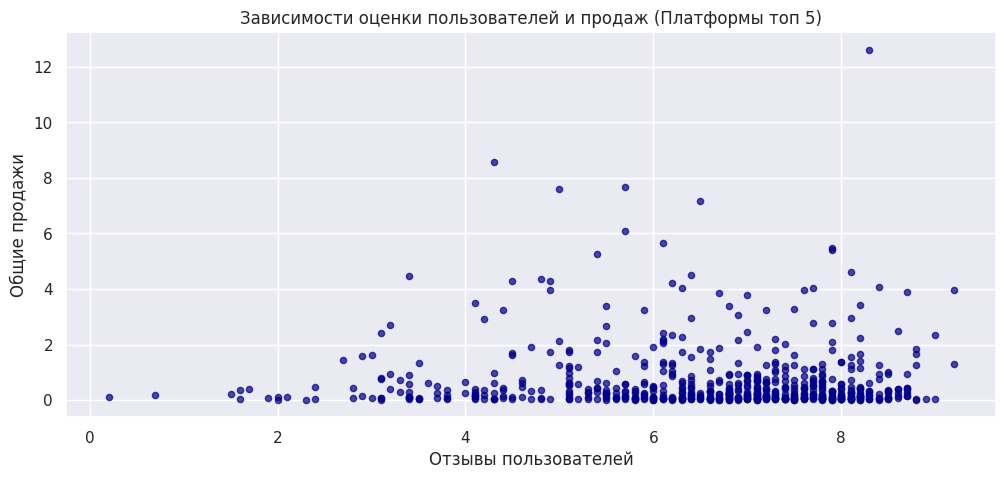

In [35]:
platform_top5.plot(title='Зависимости оценки пользователей и продаж (Платформы топ 5)',
                   x='user_score',
                   y='total_sales',kind='scatter',alpha=0.7,
                   color = 'darkblue', grid=True, figsize=(12, 5))
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи')

print('Коэффициент корреляции зависимости отзывов пользователей и продаж (Платформы топ 5)',
      platform_top5['user_score'].corr(platform_top5['total_sales']))

Зависимость отзывов и продаж на примере топ 5 платформ довольно слабая. Отзывы критиков влияют на продажи чуть больше - корреляция 0.39, зависимость прямая - чем лучше оценка, тем больше продажи.
Оценка пользователей на продажи влияет очень слабо, корреляция -0.02, зависимость обратная.

Данная картина повторила картину платформы PS4

### 3.7. Посмотрим на общее распределение игр по жанрам.

Для определния самых прибыльных жанров будем рассматривать медианы. Поскольку разброс продаж двольно сильный, на мой взгляд, именно медиана не исказит картину, что может произойти, если использовать среднее значение.

In [36]:
genre_top = data.groupby('genre')['total_sales'].median().sort_values(ascending=False)
print(genre_top) #найдем жанры с наибольшими продажами.

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64


Жанры с наибольшими продажами: Shooter, Sports, Platform, Fighting и Role-Playing.

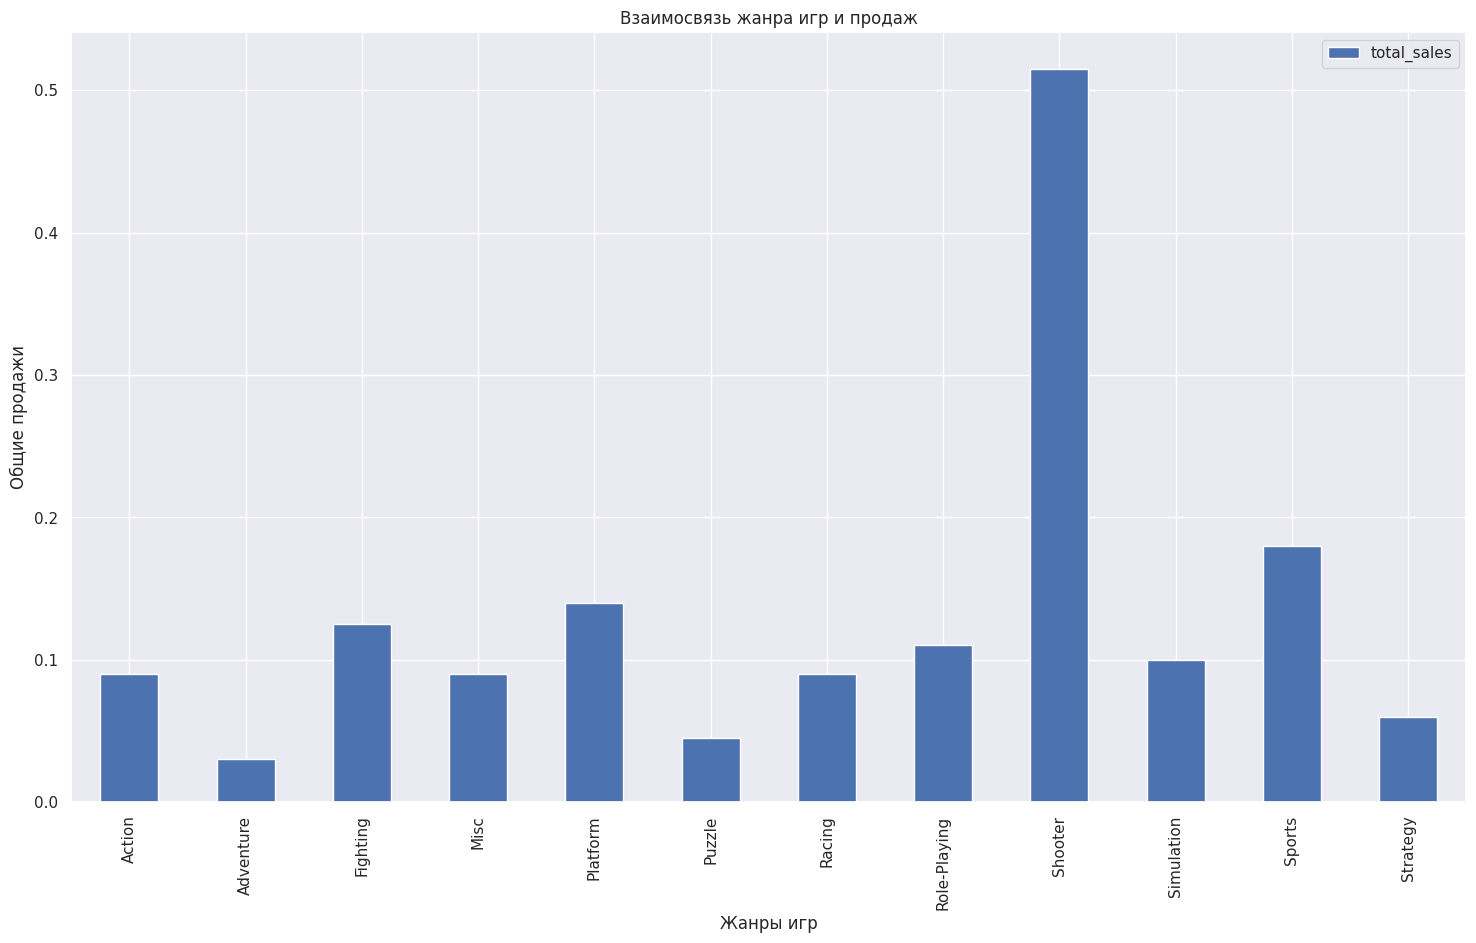

In [37]:
data.pivot_table(index='genre', values='total_sales', aggfunc='median').plot(
    title='Взаимосвязь жанра игр и продаж', kind='bar', figsize=(18, 10), grid=True)

plt.xlabel('Жанры игр')
plt.ylabel('Общие продажи');

На графике также видно, что жанр Shooter имеет наибольшие продажи, Sports - продажи ниже, но также выделяются на фоне остальных. Platform, Fighting и Role-Playing - продажи значительно меньше

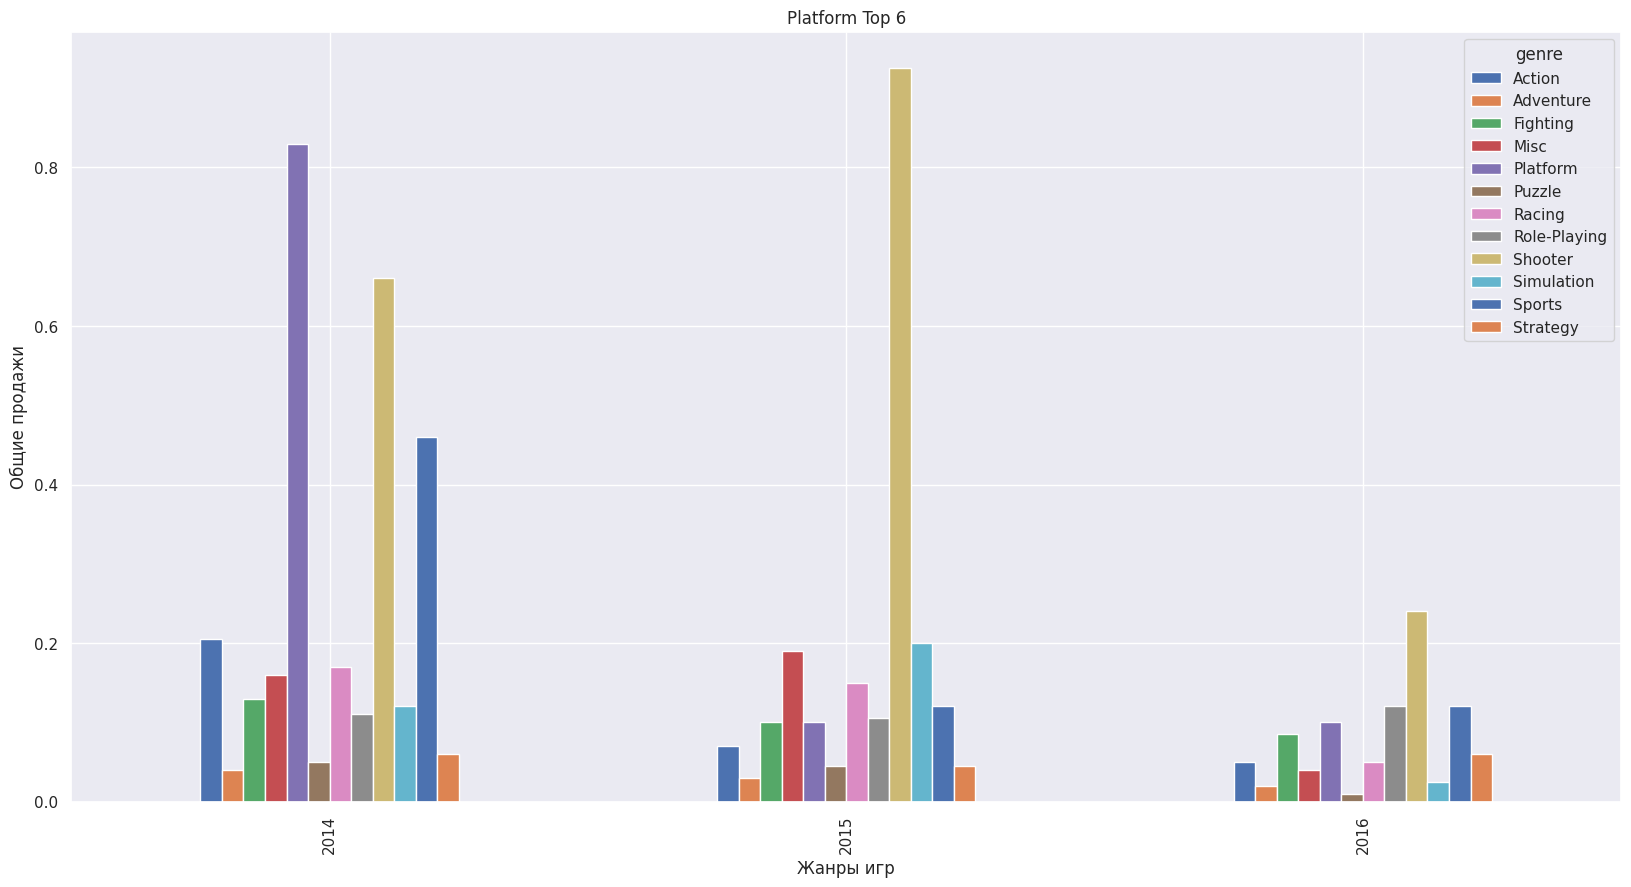

In [38]:
data.pivot_table(index='year_of_release', columns='genre',values='total_sales',
                 aggfunc='median').plot(title='Platform Top 6',
                                     kind='bar', figsize=(20, 10), grid=True);

plt.xlabel('Жанры игр')
plt.ylabel('Общие продажи');

В 2014 году лидировал жанр Platform, затем шли жанры Shooter и Sports. В 2015 году лидирующую позицию укрепил жанр Shooter (более 0.8 млн), оставив остальные жанры далеко позади. В 2016 году продажи всех жанров сильно снизились, однако Shooter продолжает занимать певрое место по продажам.

Жанр Role-Playing с 2014 по 2015 год держал примерно одинаковые продажи, что говорит о стальном интересе к данному жанру у аудитории, несмотря на не очень высокие продажи по сравнению с другими жанрами из топ-5.

Sports, Platform и Fighting в 2015 - 2016 годах показывают стабильные продажи на фоне снижения у других платофрм.

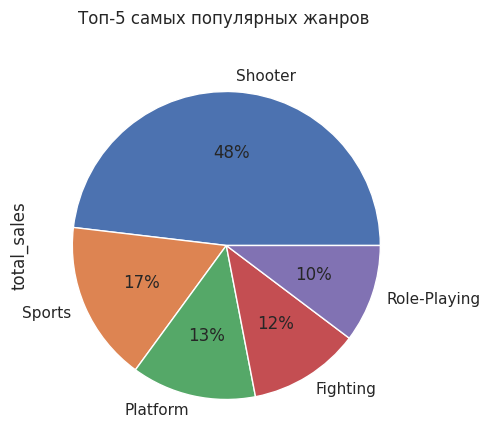

In [39]:
axis0 = data.groupby('genre')['total_sales'].median().sort_values(ascending = False).head()\
.plot(kind='pie',subplots=True, figsize=(5, 5), autopct='%.0f%%')
plt.title('Топ-5 самых популярных жанров \n');

На круговой диаграмме видим, что Shooter составляет почти половину от всех продаж (48%)
Далее
* Sports - 17%
* Platform - 13%
* Fighting - 12%
* Role-Playing - 10%

Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.

## 4. Составим портрет пользователя каждого региона

### 4.1. Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры и платформы.

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
WiiU    19.36
PC       7.23
PSV      2.52
Wii      2.08
PSP      0.00
Name: na_sales, dtype: float64


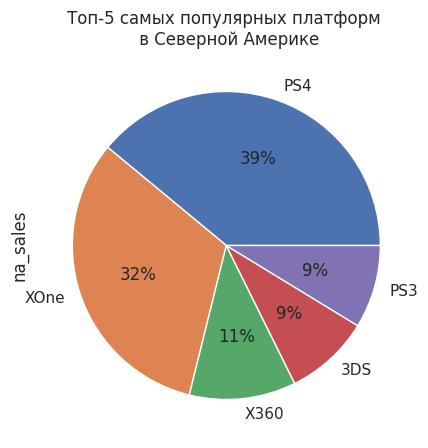

In [40]:
platform_top5_na = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
print(platform_top5_na.head(10)) #найдем платформы с наимольшими продажами в Северной Америке (NA).
#Самые популярные платфомы в Северной Америке: PS4, XOne, X360, 3DS, PS3

axis1 = data.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head()\
.plot(kind='pie',subplots=True, figsize=(5, 5), autopct='%.0f%%')
plt.title('Топ-5 самых популярных платформ \n в Северной Америке');

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
X360     15.49
WiiU     13.15
PSV       3.53
Wii       2.59
PSP       0.00
Name: eu_sales, dtype: float64


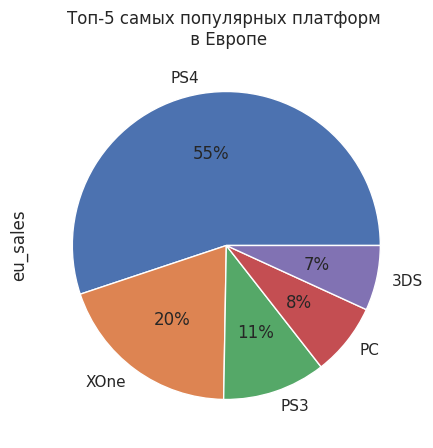

In [41]:
platform_top5_eu = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
print(platform_top5_eu.head(10)) #найдем платформы с наимольшими продажами в Европе (EU).
#Самые популярные платфомы в Европе: PS4, XOne, PS3, PC, 3DS

axis2 = data.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head()\
.plot(kind='pie',subplots=True, figsize=(5, 5), autopct='%.0f%%')
plt.title('Топ-5 самых популярных платформ \n в Европе');

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
PSP      0.36
XOne     0.32
X360     0.08
PC       0.00
Wii      0.00
Name: jp_sales, dtype: float64


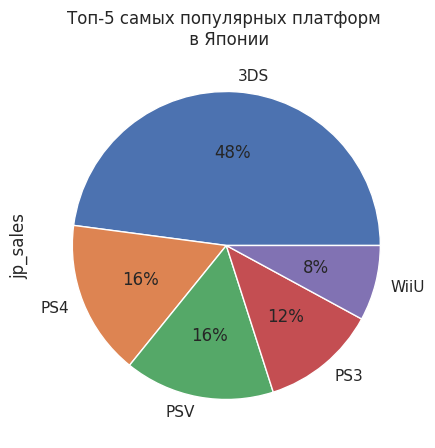

In [42]:
platform_top5_jp = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
print(platform_top5_jp.head(10)) #найдем платформы с наимольшими продажами в Японии (JP).
#Самые популярные платфомы в Японии: 3DS, PS4, PSV, PS3, WiiU

axis3 = data.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head()\
.plot(kind='pie',subplots=True, figsize=(5, 5), autopct='%.0f%%')
plt.title('Топ-5 самых популярных платформ \n в Японии');

Самыми популярными платформами в Северной Америке и Европе являются PS4 (39% и 55%), XOne(32% и 20%). остальные платформы занимаю не более 11% (PS3 9% и 11%, 3DS 9% и 7%, X360 11% в Северной Америке, PC 8% в Европе). Распределение немного отличается, но платформы те же.
    
Однако в Японии на 1ом месте 3DS 48%, в Северной Америке и Европе эта платформа лишь 4 и 5 месте. Платформа PS4 лишь на 2ом месте с 18%, хотя в Северной Америке и Европе эта платформа занимает половину рынка.

### 4.2. Определим самые популярные жанры в Северной Америке, Европе и Японии.

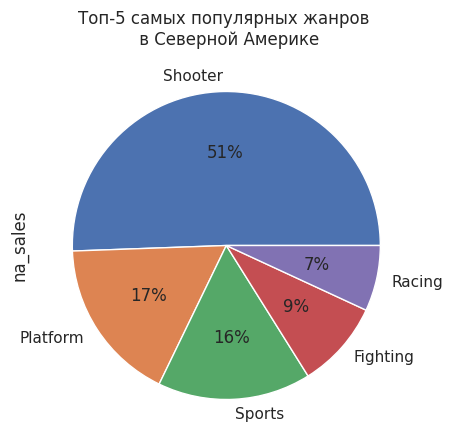

In [43]:
axis1 = data.groupby('genre')['na_sales'].median().sort_values(ascending = False).head()\
.plot(kind='pie',subplots=True, normalize=True, figsize=(5, 5), autopct='%.0f%%')
plt.title('Топ-5 самых популярных жанров \n в Северной Америке');

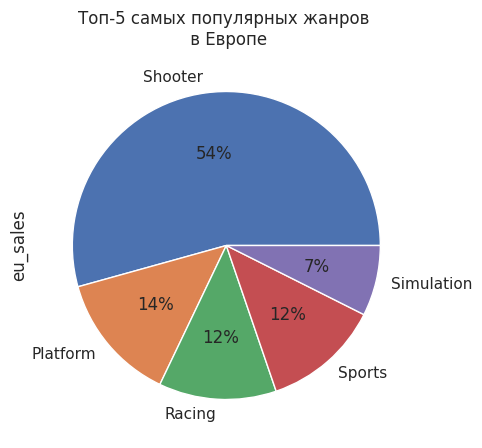

In [44]:
axis2 = data.groupby('genre')['eu_sales'].median().sort_values(ascending = False).head()\
.plot(kind='pie', subplots=True, normalize=True, figsize=(5, 5), autopct='%.0f%%')
plt.title('Топ-5 самых популярных жанров \n в Европе');

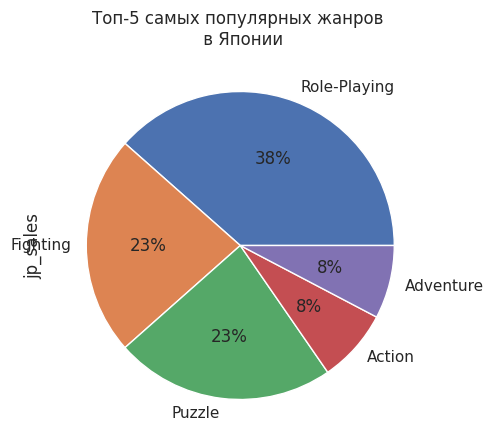

In [45]:
data.groupby('genre')['jp_sales'].median().sort_values(ascending = False).head()\
.plot(kind='pie', subplots=True, normalize=True, figsize=(5, 5), autopct='%.0f%%')
plt.title('Топ-5 самых популярных жанров \n в Японии');

На гистограммах видно, что в Северной Америке и Европе картина примерно одинаковая и совпадает с процентным соотношением по общим продажам:

Shooter - самый популярный жанр в Северной Америке и Европе - половина рынка (51 и 54%). В Японии этот жанр не является популярным. На первом месте в Японии жанр Role-Plaing - 38%

Жанры Platform, Sports, Rasing  в Северной Америке и Евроме занимают не более 17% рынка, когда в Японии они вовсе не популярны. Однако жанры Fighting и Puzzle занимают по 23% от рынка (2 и 3 место по популярности)
    
Картина в Сервной Америке и Европе очень отличается от Японии.


### 4.3. Определим влияние рейтинга ESRB на продажи в отдельных регионах.

In [46]:
rating_by_reg = platform_top5.pivot_table(index='rating',
                                         values=['na_sales', 'eu_sales', 'jp_sales'],
                                         aggfunc='sum')\
.apply(lambda col:col/col.sum()).style.format('{:.1%}')
display(rating_by_reg)

,eu_sales,jp_sales,na_sales
rating,,,
E,21.2%,7.7%,16.8%
E10+,7.8%,3.3%,10.0%
M,36.4%,9.9%,35.9%
T,12.0%,14.6%,13.6%
unknown,22.6%,64.4%,23.7%


Описание рейтинга:
* E (everyone) - для всех;
* T (Teen) - подростки;
* M (Mature) - для взрослых;
* E+10 (everyone 10 and older) - для всех от 10 и страше.

Согласно таблице в Европе и Северной Америке самый популярный рейтинг М (44%), т.е. игры для взрослых.
В Японии у 64.4% игр отсутствует рейтинг. Это связано с тем, что в Японии игры не маркируются по системе ESRB. У них есть свой рейтинг CERO.

## 5. Проверка гипотез
   

#### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

```
H_0: Средний пользовательскй рейтинг платформы Xbox One = Средний пользовательскй рейтинг платформы PC`
H_a: Средний пользовательскй рейтинг платформы Xbox One ≠ Средний пользовательскй рейтинг платформы PC`
alpha = 0.05
```

In [47]:
data = data[data['user_score'] != -1]
xbox_platform = data[(data['platform'] =='XOne')]['user_score']
pc_platform = data[(data['platform'] =='PC')]['user_score']

alpha = 0.05
results = st.ttest_ind(
    xbox_platform,
    pc_platform, nan_policy='omit', equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



# results = вызов метода для проверки гипотезы
# alpha = задайте значение уровня значимости
# вывод значения p-value на экран
# условный оператор с выводом строки с ответом

p-значение: 0.10450507919348513
Не получилось отвергнуть нулевую гипотезу


Т.е. нулевая гипотеза верна - средний пользовательский рейтинг платформ Xbox One и PC равны.
Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам использовался специальный метод : scipy.stats.ttest_ind (array1, array2, equal_var).

#### 5.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

```
H_0: Средний пользовательский рейтинг жанра Action = Средний пользовательский рейтинг жанра Sports`
H_a: Средний пользовательский рейтинг жанра Action ≠ Средний пользовательский рейтинг жанра Sports`
alpha = 0.05
```

In [48]:
action_genre = data[(data['genre'] == 'Action')]['user_score']
sports_genre = data[(data['genre'] == 'Sports')]['user_score']

alpha = 0.05
results = st.ttest_ind(
    action_genre,
    sports_genre, nan_policy='omit', equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



# results = вызов метода для проверки гипотезы
# alpha = задайте значение уровня значимости
# вывод значения p-value на экран
# условный оператор с выводом строки с ответом

p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


Нулевая гипотеза должна содержать в себе утверждение, поэтому нулевой гипотезой будем считать что средний пользовательский рейтинг жанров Action и Sports равны.
После проведения анализа мы отвергаем нулевую гипотезу и считаем, что средние пользовательские рейтинги этих жанров не равны.
Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам использовался специальный метод : scipy.stats.ttest_ind (array1, array2, equal_var).

## 6. Общий вывод


В процессе анализа данных было сделано следующее:
   - замена названий столбцов (приведение к нижнему регистру)
   - преобразование данных в нужные типы. Описала, в каких столбцах заменила тип данных и почему.
   - обработка пропусков. Объяснила заполнение или не заполнение пропуксов. Пояснила возможные причины появления пропусков.
   - расчет суммарных продаж во всех регионах, занесение полученных значений в отдельный столбец.
    
Развитие игр с 1980 по 2000 было слабым. В 2000 году можно наблюдать активный рост количества игр, который продолжался до 2009 года. На 2008 и 2009 года приходится пик продаж игр, но начиная с 2010 начинается спад.
    В топ 6 платформ за весь период можно выделить:
- PS2 - успешен с 2002 по 2004
- X360 - успешен  с 2010 по 2011
- PS3 - успешен с 2008 по 2011
- Wii - успешен с 2006 по 2009
- DS - успешен с 2007 по 2008
- PS - успешен с 1998 по 1999
    
Новые платформы быстро набирают популярность, удерживают ее в течение 3-4 лет и заьем их продажи снижаются. При этом ни одна из представленных в топ-6 платформ уже не является актуальной.
    
Был анализирован период с 2014 по 2016 годы, и выделены новые топ 5 платформ для анализа: PS4, XOne, SDS, PS3, X360, которые обладали самыми большими продажами и были популярны.
Платформы, показывающие успешные показатели в актуальный период значительно отличаются отплатформ за весь период. Самыми привлекательными являются платформы PS4 и XOne, занявшие первое и второе место в топ-5 платформ с 2014 по 2016 года.
    
Корреляция для потенциально самой успешной платформы PS4 между пользовательскими оценками и продажами отсутствует, т.к. значение почти нулевое. Оценка критиков влияет на продажи, но не сильно, о чем говорит корреляция 0.4. При
этом зависимость прямая: чем выше оценка критиков, тем выше продажи.
    
На рынках Северной Америки, Европы и Японии можно выделить только три платформы, популярные в эти странах: PS4, 3DS и PS3.
    
Жанры игр страны предпочитают разные, однако большинство склоняется к жанру Shooter. В Японии самым популярным является жанр Role-Playing (38%), который не популяерен в других странах. Также в топ-5 жанров попадают Platform и Sport.
    
А в ТОП рейтинг от организации ESRB можно считать категорию M (для взрослых)
  Нулевая гипотеза о том, средний пользовательский рейтинг платформ Xbox One и PC равны, является верной. А вот гипотеза о том, что средние пользовательские рейтинги этих жанров равны отвергаем, это не верно.

В 2017 году ставку можно сделать на PS4, так как она популярна в большинстве стран мира. Следует выбрать жанр Shooter, хотя также можно обратить внимание на жанр Platform и Fighting (они входят в топ популярных жанров большиства стран). Ворастная категория M (для взрослых) пользуется большим спросом.